# Anime Recommendation System Using Python: Building a Content-Based Filtering Model

## Persiapkan dataset

- asal dataset : CooperUnion/anime-recommendations-database

In [1]:
import zipfile
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"korn1123","key":"a99a5e87b6ef27d031e80cdb1e32e6a5"}'}

In [3]:
!kaggle datasets download -d CooperUnion/anime-recommendations-database

Dataset URL: https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database
License(s): CC0-1.0
100% 25.0M/25.0M [00:01<00:00, 21.6MB/s]
100% 25.0M/25.0M [00:01<00:00, 14.9MB/s]


In [4]:
with zipfile.ZipFile('anime-recommendations-database.zip', 'r') as zip_ref:
    zip_ref.extractall('anime-recommendations-database')

In [5]:
anime_all = pd.read_csv('/content/anime-recommendations-database/anime.csv')

## Data Understanding

In [39]:
anime_all

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


## Univariate Exploratory Data Analysis

In [42]:
anime_all.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [44]:
anime_all.groupby('genre')['genre'].agg('count')

,genre
genre,
Action,53
"Action, Adventure",15
"Action, Adventure, Cars, Comedy, Sci-Fi, Shounen",2
"Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports",1
"Action, Adventure, Cars, Sci-Fi",1
...,...
"Super Power, Supernatural, Vampire",1
Supernatural,14
Thriller,1


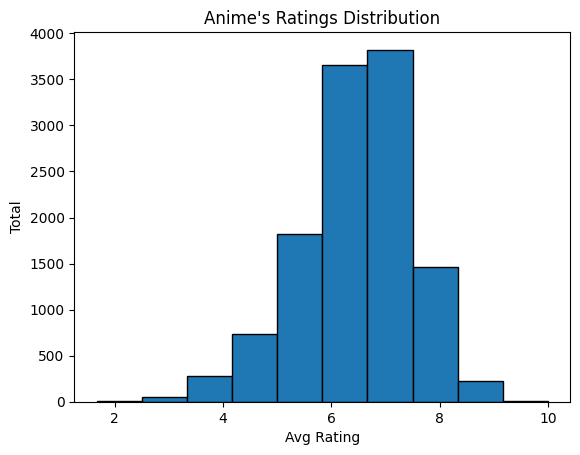

In [45]:
import matplotlib.pyplot as plt

plt.hist(anime_all.rating, edgecolor = 'black')
plt.title("Anime's Ratings Distribution")
plt.ylabel('Total')
plt.xlabel('Avg Rating')
plt.show()

## Data Preparation

### Selection Data

In [47]:
anime_add = pd.DataFrame(anime_all, columns=['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'])

In [48]:
anime_add

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


### missing values

In [49]:
anime_add.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [50]:
anime_add = anime_add.dropna(axis=0)

In [51]:
anime_add

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [52]:
anime_add.isna().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [54]:
anime = anime_add

In [55]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


### Menggabungkan Data

#### Top 10 Rekomendasi anime

In [59]:
anime.sort_values(by = 'rating', ascending=False).head(10)

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1,10.00,13
10400,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.60,47
9595,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1,9.33,44
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
10786,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25,53
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


## Content Based Filtering Model

In [60]:
import sklearn

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
tf = TfidfVectorizer()
tf.fit(anime['genre'])
tf.get_feature_names_out()

array(['action', 'adventure', 'ai', 'arts', 'cars', 'comedy', 'dementia',
       'demons', 'drama', 'ecchi', 'fantasy', 'fi', 'game', 'harem',
       'hentai', 'historical', 'horror', 'josei', 'kids', 'life', 'magic',
       'martial', 'mecha', 'military', 'music', 'mystery', 'of', 'parody',
       'police', 'power', 'psychological', 'romance', 'samurai', 'school',
       'sci', 'seinen', 'shoujo', 'shounen', 'slice', 'space', 'sports',
       'super', 'supernatural', 'thriller', 'vampire', 'yaoi', 'yuri'],
      dtype=object)

In [63]:
tfidf_matrix = tf.fit_transform(anime['genre'])
tfidf_matrix.shape

(12017, 47)

In [64]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29498527, 0.3162867 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.2516182 , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [65]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns = tf.get_feature_names_out(),
    index = anime.name
).sample(27, axis=1).sample(10, axis=0)

,samurai,adventure,thriller,military,drama,mecha,magic,harem,game,police,...,sports,slice,shounen,dementia,supernatural,demons,super,sci,psychological,hentai
name,,,,,,,,,,,,,,,,,,,,,
Ookamikakushi,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.464851,0.0,0.0,0.000000,0.0,0.0
Fen Qing,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
Future GPX Cyber Formula Sin,0.0,0.000000,0.0,0.0,0.401572,0.0,0.0,0.0,0.0,0.0,...,0.589082,0.000000,0.419437,0.0,0.000000,0.0,0.0,0.397363,0.0,0.0
Yakimochi Caprice,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.577350,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
Naisho no Tsubomi,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.347571,0.000000,0.0,0.367002,0.0,0.0,0.000000,0.0,0.0
Blue Seed 1.5,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.515131,0.0,0.0
I&#039;&#039;s,0.0,0.000000,0.0,0.0,0.668106,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
Sign,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.517297,0.0,0.0
Kaeru San Yuushi,0.0,0.802761,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [66]:
from sklearn.metrics.pairwise import cosine_similarity

In [67]:
coSim = cosine_similarity(tfidf_matrix)
coSim

array([[1.        , 0.14715318, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14715318, 1.        , 0.17877808, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17877808, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [68]:
coSim_df = pd.DataFrame(coSim, index = anime['name'], columns=anime['name'])
print('Shape : ', coSim_df.shape)

coSim_df.sample(10, axis=1).sample(10, axis=0)

Shape :  (12017, 12017)


name,Samurai Giants,Yuuto-kun ga Iku,Hana to Mogura,Animal 1,High School DxD Specials,Hellsing I: Digest for Freaks,SF Saiyuuki Starzinger,Uchuu Patrol Hopper,Ichiban Ushiro no Daimaou Specials,Madou King Granzort: Nonstop Rabi
name,,,,,,,,,,
Ultra Nyan: Hoshizora kara Maiorita Fushigi Neko,0.0,0.495515,0.545869,0.0,0.116913,0.000000,0.000000,0.000000,0.152526,0.130077
Koe de Oshigoto! The Animation,0.0,0.000000,0.325771,0.0,0.351549,0.233557,0.000000,0.000000,0.458637,0.077629
Celebration and Chorale,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Detonator Orgun,0.0,0.000000,0.000000,0.0,0.000000,0.086700,0.602489,0.443601,0.000000,0.708538
3 Choume no Tama: Uchi no Tama Shirimasenka?,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.331979,0.000000,0.000000,0.000000
DNA Hunter,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sketchbook: Full Color&#039;s Picture Drama,0.0,0.000000,0.325202,0.0,0.069651,0.000000,0.000000,0.000000,0.090868,0.077493
Genmu Senki Leda,0.0,0.000000,0.000000,0.0,0.000000,0.064044,0.556082,0.327683,0.385198,0.851892
Q Transformers: Kaette Kita Convoy no Nazo,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.197665,0.000000,0.000000,0.191007


In [69]:
def anime_recommendation(
                    name,
                    similarity_data = coSim_df,
                    items = anime[['name', 'genre']],
                    k=5):

                    index = similarity_data.loc[:,name].to_numpy().argpartition(range(-1, -k, -1))
                    closest = similarity_data.columns[index[-1:-(k+2):-1]]
                    closest = closest.drop(name, errors='ignore')

                    return pd.DataFrame(closest).merge(items).head(k)

In [70]:
anime[anime.name.eq('Nayuta')]

,anime_id,name,genre,type,episodes,rating,members
6607,3480,Nayuta,"Action, Sci-Fi, Shoujo",OVA,1,6.04,549


In [71]:
anime_recommendation('Nayuta')

,name,genre
0,Daa! Daa! Daa!,"Comedy, Sci-Fi, Shoujo"
1,Angelique: Twin Collection,"Fantasy, Sci-Fi, Shoujo"
2,Karneval,"Fantasy, Sci-Fi, Shoujo"
3,Boku no Chikyuu wo Mamotte,"Drama, Sci-Fi, Shoujo"
4,Hal,"Romance, Sci-Fi, Shoujo"
